In [1]:
# Compare Algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# load dataset
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv('diabetes_data.csv', names = names)

#Split X and Y values
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [5]:
# prepare classifier models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF2', RandomForestClassifier(max_depth=2, random_state=0)))
models.append(('RF4', RandomForestClassifier(max_depth=4, random_state=0)))
models.append(('RF6', RandomForestClassifier(max_depth=6, random_state=0)))

In [6]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.768233 (0.051906)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.703059 (0.057784)
NB: 0.755178 (0.042766)
RF2: 0.738278 (0.048440)
RF4: 0.769498 (0.057441)
RF6: 0.770796 (0.061396)


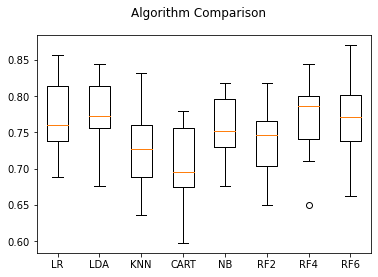

In [7]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()